In [1]:
# !pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme = 'onedork')

In [2]:
import warnings
warnings.filterwarnings("ignore")

# [Data](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv)

# Değişkenlerin isimleri yoksa, ilk satırı sütun olarak almaması için bu şekilde giriş yaparız:
* header = **_None_**

In [3]:
import pandas as pd

In [4]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

df = pd.read_csv(url, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Sütun Adı Ekleme

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
           "engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size",
           "fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# "?" Verileri Kaldırmak

In [6]:
import numpy as np

df = df.replace("?", np.NaN)

# Fiyat sütunundaki eksik değerleri kaldıralım.

df = df.dropna(subset = ["price"], axis = 0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Tipleri

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Describe

In [8]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
# Belirli sütunların istatistiklerine bakalım.

df[["length","compression-ratio"]].describe()

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


# Info
* Veri kümemizi kontrol etmek için bir başka yöntemdir. 
* Verinin kısa bir özetini sağlar.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# Eksik Veriler

In [11]:
# Her sütundaki eksik değerleri saydıralım.

df.isnull().sum().sort_values(ascending = False)

normalized-losses    37
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
price                 0
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

In [12]:
# normalized-losses, bore, stroke, horsepower & peak-rpm sütularını eksik değerlerini kendi ortalamaları ile dolduralım.

avg_norm_loss = df["normalized-losses"].astype("float").mean()
avg_bore = df["bore"].astype("float").mean()
avg_stroke = df["stroke"].astype("float").mean()
avg_horsepower = df["horsepower"].astype("float").mean()
avg_peakrpm = df["peak-rpm"].astype("float").mean()

df["normalized-losses"] = df["normalized-losses"].replace(np.NaN, avg_norm_loss)
df["bore"] = df["bore"].replace(np.NaN, avg_bore)
df["stroke"] = df["stroke"].replace(np.NaN, avg_stroke)
df["horsepower"].replace(np.NaN, avg_horsepower, inplace = True)
df["peak-rpm"].replace(np.NaN, avg_peakrpm, inplace = True)

In [13]:
# num-of-doors değişkenindeki gözlemleri saydılarım.

df["num-of-doors"].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [14]:
# 4 kapılı araçların daha yaygın olduğunu görüyoruz.
# Buna bir başka method ile bakalım.

df["num-of-doors"].value_counts().idxmax()

'four'

In [15]:
# Eksik değerleri four ile dolduralım.

df["num-of-doors"].replace(np.NaN, "four", inplace = True)
df["num-of-doors"].isnull().sum()

0

In [16]:
# Fiyat verisindeki eksik değerli satırları kaldırdık.
# Haricindeki eksik değerleri de uygun şekilde doldurduk.
# Şimdi indexleri resetliyoruz.

df.reset_index(drop = True, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Doğru Veri Formatı
* Tüm verilerin doğru formatta olup olmadığını kontrol edeceğiz.

In [17]:
# Her değişken için veri türlerini isteyelim.

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
# Bazı değişkenler doğru veri tipinde değildir.

df[["normalized-losses","horsepower"]] = df[["normalized-losses","horsepower"]].astype("int")
df[["bore","stroke","peak-rpm","price"]] = df[["bore","stroke","peak-rpm","price"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Veri Standardizasyonu
* Araştırmacının anlamlı karşılaştırma yapmasına olanak tanıyan verileri ortak bir formata dönüştürme sürecidir.

In [20]:
# L/100km = 235/mpg

df["city-L/100km"] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]
df.drop(["city-mpg","highway-mpg"], axis = 1, inplace = True)

# Veri Normalleştirme
* Normalleştirme birkaç değişkenin aralığını benzer aralığa dönüştürme işlemidir.
* Tipik normalleştirmede ortalama 0 varyans 1 olur veya değerler 0-1 arasında değişir.

In [21]:
# length, width, height değişkenlerini 0-1 arasında olacak şekilde normalleştirelim.
# orjinal değer/maximum değer

df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


# Binning
* Gruplanmış analiz için sürekli sayısal değişkenleri ayrı kutulara dönüştürme işlemidir.
* "horsepower" 48-288 arasında sürekli değişkendir ve 57 tane benzersiz değere sahiptir.

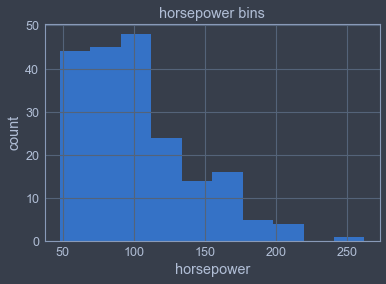

In [22]:
# horsepower değişkenini üç bölmeye ayıracağız.
# Nasıl dağıldığını görmek için histogramını çizelim.

from matplotlib import pyplot
import matplotlib as plt

plt.pyplot.hist(df["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins");

In [23]:
# Eşit büyüklükte bant genişliğine sahip 3 kutumuz olmasını istiyoruz.

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ["Low","Medium","High"]

# Her birinin neye ait olduğunu belirlemek için pd.cut metodunu kullanırız.

df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels = group_names, include_lowest = True)
df[["horsepower-binned","horsepower"]].head()

,horsepower-binned,horsepower
0,Low,111
1,Low,111
2,Medium,154
3,Low,102
4,Low,115


In [24]:
# Her bölmedeki araç sayısını görelim.

df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

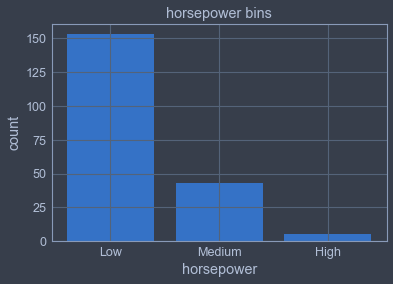

In [25]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())
pyplot.xlabel("horsepower")
pyplot.ylabel("count")
pyplot.title("horsepower bins");

# Dummy Değişkeni
* Kategorileri etiketlemek için kullanılan sayısal değişkenlerdir.
* Kategorik değişkenleri modellere verebilmek için kullanırız.

In [26]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
dummy_variable_1.rename(columns = {"gas" : "fuel-type-gas",
                                   "diesel" : "fuel-type-diesel"}, inplace = True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
df = pd.concat([df, dummy_variable_1], axis = 1)
df = df.drop("fuel-type", axis = 1)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low,0,1


In [29]:
# Aynı işlemleri aspiration değişkeni için de yapalım.

dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns = {"std" : "aspiration-std",
                                   "turbo" : "aspiration-turbo"}, inplace = True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [30]:
df = pd.concat([df, dummy_variable_2], axis = 1)
df = df.drop("aspiration", axis = 1)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low,0,1,1,0


# Doğru görselleştirme nasıl seçilir?
* Öncelikle değişken tiplerini kontrol etmeliyiz. O değişken için doğru görselleştirmeye karar vermemize yardımcı olacak.

In [31]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

In [32]:
# Korelasyon hesaplayalım.

df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


In [33]:
# bore, stroke, compression-ratio ve horsepower değişkenleri arasındaki korelasyonu bulunuz.

df[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


# Sürekli Sayısal Değişkenler
* Bir aralıkta herhangi bir değer alabilen değişkenlerdir.
* Bu değişkenleri görselleştirmenin en iyi yolu yerleştirilmiş çizgilerle dağılım grafikleri kullanmaktır.

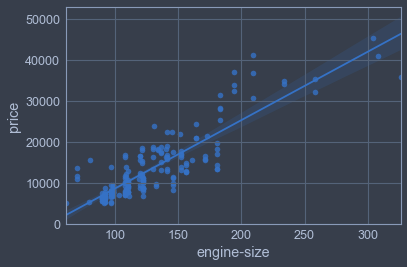

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0,);

* Motor büyüklüğü arttıkça fiyat da artar. Bu iki değişken arasında pozitif bir doğrudan korelasyon olduğunu gösterir.
* Motor boyutu ve fiyat arasındaki ilişkiyi incelersek, yaklaşık olarak 0.87 olduğunu görürüz.

In [35]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


# Kategorik Değişkenler
* Kategorik değişkenleri en iyi yolu kutu grafikleri kullanmaktır.

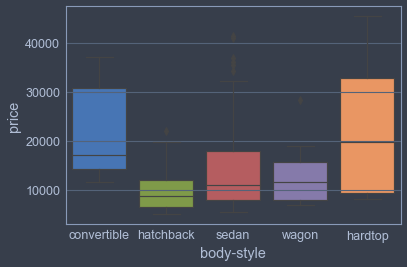

In [36]:
# body-style ve price arasındaki ilişkiye bakalım.

sns.boxplot(x = "body-style", y = "price", data = df);

* Farklı vücut stili kategorileri arasındaki fiyat dağılımlarının önemli bir örtüşmeye sahip olduğunu ve bu nedenle vücut stilinin fiyat için iyi bir tahmin unsuru olmayacağını görüyoruz.

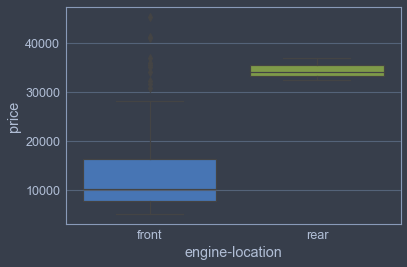

In [37]:
# engine-location ve price arasındaki ilişkiye bakalım.

sns.boxplot(x = "engine-location", y = "price", data = df);

* Burada, bu iki motor konumu kategorisi, ön ve arka arasındaki fiyat dağılımının, motor konumunu potansiyel iyi bir fiyat öngörücüsü olarak almak için yeterince farklı olduğunu görüyoruz.

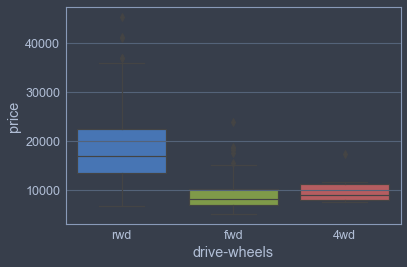

In [38]:
# drive-wheels ve price arasındaki ilişkiye bakalım.

sns.boxplot(x = "drive-wheels", y = "price", data = df);

* Burada, farklı tahrik tekerlekleri kategorileri arasındaki fiyat dağılımının farklı olduğunu görüyoruz; çünkü bu tür tahrik tekerlekleri potansiyel olarak bir fiyat habercisi olabilir.

# Tanımlayıcı İstatistiksel Analiz
* Tüm sürekli değişkenler için temel istatistikleri otomatik olarak hesaplar.
* Tüm NaN değerleri otomatik olarak atlar.

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,0.899108,0.040933,0.799331,0.869565,0.904682,0.928094,1.000000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330711,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,201.0,3.256904,0.316048,2.070000,3.110000,3.290000,3.410000,4.170000


In [40]:
df.describe(include = "object").T

,count,unique,top,freq
make,201,22,toyota,32
num-of-doors,201,2,four,115
body-style,201,5,sedan,94
drive-wheels,201,3,fwd,118
engine-location,201,2,front,198
engine-type,201,6,ohc,145
num-of-cylinders,201,7,four,157
fuel-system,201,8,mpfi,92


In [41]:
df["body-style"].value_counts().to_frame()

,body-style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


# Gruplama
* **Groupby** yöntemi, verileri farklı kategorilere göre gruplandırır.
* Veriler, bir veya birkaç değişkene göre gruplandırılır ve tek tek gruplar üzerinde analiz yapılır.
* Birden çok değişkenle de gruplayabilirsiniz.

In [42]:
# drive-wheels degişkenine göre gruplayalım.

df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [43]:
df["drive-wheels"].nunique()

3

In [44]:
df_group_one = df[["drive-wheels","body-style","price"]]
df_group_one = df_group_one.groupby("drive-wheels", as_index = False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


* Verilerimize göre, arkadan çekişli araçların ortalama olarak en pahalı olduğu görülürken, 4 teker ve ön teker yaklaşık olarak aynı fiyattadır.

In [45]:
df_group_two = df[["drive-wheels","body-style","price"]]
df_group_two = df_group_two.groupby(["drive-wheels","body-style"], as_index = False).mean()
df_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


* İkinci veriyi pivot haline getirirsek daha kolay gözlemleriz.

In [46]:
df_group_two = df_group_two.pivot(index = "drive-wheels", columns = "body-style")
df_group_two

price                                                        
body-style   convertible       hardtop     hatchback         sedan         wagon
drive-wheels                                                                    
4wd                  NaN           NaN   7603.000000  12647.333333   9095.750000
fwd              11595.0   8249.000000   8396.387755   9811.800000   9997.333333
rwd              23949.6  24202.714286  14337.777778  21711.833333  16994.222222

* Buradaki eksik verileri şimdilik sıfır ile dolduralım.

In [47]:
df_group_two = df_group_two.fillna(0)
df_group_two

price                                                        
body-style   convertible       hardtop     hatchback         sedan         wagon
drive-wheels                                                                    
4wd                  0.0      0.000000   7603.000000  12647.333333   9095.750000
fwd              11595.0   8249.000000   8396.387755   9811.800000   9997.333333
rwd              23949.6  24202.714286  14337.777778  21711.833333  16994.222222

In [48]:
# Her arabanın body-style tipine göre fiyat ortalamalarına bakalım.

df_group_three = df[["body-style","price"]]
df_group_three = df_group_three.groupby("body-style", as_index = False).mean()
df_group_three

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


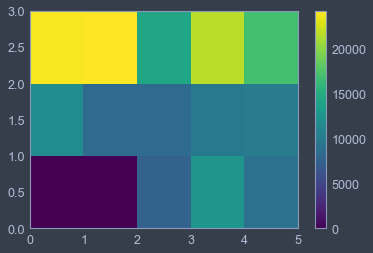

In [49]:
# body-style ve price arasındaki ilişkiyi görselleştirmek için ısı haritası kullanalım.

plt.pcolor(df_group_two)
plt.colorbar()
plt.show();

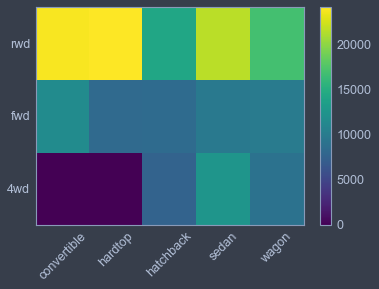

In [50]:
# Varsayılan etiketler bize yararlı bilgi vermez. Bunu değiştirelim.

fig, ax = plt.subplots()
im = ax.pcolor(df_group_two)

row_labels = df_group_two.columns.levels[1]
col_labels = df_group_two.index

ax.set_xticks(np.arange(df_group_two.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_group_two.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation = 45)

fig.colorbar(im)
plt.show();

# Korelasyon ve Nedensellik
##### **_Korelasyon_**
* Değişkenler arasındaki karşılıklı bağımlılık ölçüsü.

##### **_Nedensellik_**
* İki değişken arasındaki neden-sonuç ilişkisi.
* Nedensellik bağımsız deneyler gerektirebileceğinden, korelasyonu belirlemek çok daha basittir.

### **_Pearson Korelasyonu_**
* Ortaya çıkan katsayı [-1,1] arasında değerdir.
* **1** toplam pozitif doğrusal korelasyon.
* **0** doğrusal korelasyon yok, iki değişken büyük olasılıkla birbirini etkilemiyor.
* **-1** toplam negatif doğrusal korelasyon.

In [51]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


### **_P-value_**
* P-value, bu iki değişken arasındaki korelasyonun istatistiksel olarak anlamlı olma olasılık değeridir.
* Normalde 0.05 anlamlılık düzeyi seçeriz, bu da değişkenler arasındaki korelasyonun önemli olduğundan % 95 emin olduğumuz anlamına gelir.
    * **P-value < 0.001:** Korelasyonun anlamlı olduğuna dair güçlü kanıtlar olduğunu söylüyoruz.
    * **P-value < 0.05:** Korelasyonun anlamlı olduğuna dair orta düzeyde kanıt var.
    * **P-value < 0.1:** Korelasyonun önemli olduğuna dair zayıf bir kanıt var.

In [52]:
from scipy import stats

### **_Wheel Base vs Price_**
* Pearson korelasyonu katsayısını ve P-value değerlerini hesaplayalım.

In [53]:
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])

print("Pearson Korelasyon:", pearson_coef, "\n"
      "P-value:", p_value)

Pearson Korelasyon: 0.5846418222655081 
P-value: 8.076488270732989e-20


* P-value < 0.001 olduğundan, wheel-base ile price arasındaki korelasyon istatistiksel olarak anlamlıdır, ancak doğrusal ilişki son derece güçlü değildir (~0.585).

### **_Horsepower vs Price_**

In [54]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])

print("Pearson Korelasyon:", pearson_coef, "\n"
      "P-value:", p_value)

Pearson Korelasyon: 0.8097290352560285 
P-value: 5.924001027593172e-48


* P-value < 0.001 olduğundan, horsepower ile price arasındaki korelasyon istatistiksel olarak anlamlıdır ve doğrusal ilişki oldukça güçlüdür (~0.809, 1'e yakın).

### **_Length vs Price_**

In [55]:
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])

print("Perason Korelasyonu:", pearson_coef, "\n"
      "P-value:", p_value)

Perason Korelasyonu: 0.6906283804483642 
P-value: 8.016477466158759e-30


* P-value < 0.001 olduğundan, uzunluk ve fiyat arasındaki korelasyon istatistiksel olarak anlamlıdır ve doğrusal ilişki orta derecede güçlüdür (~ 0.691).

### **_Width vs Price_**

In [56]:
pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])

print("Pearson Korelasyonu:", pearson_coef, "\n"
      "P-value:", p_value)

Pearson Korelasyonu: 0.7512653440522673 
P-value: 9.200335510481646e-38


* P-value < 0.001 olduğundan, genişlik ve fiyat arasındaki korelasyon istatistiksel olarak anlamlıdır ve doğrusal ilişki oldukça güçlüdür (~ 0,751).

### **_Curb-Weight vs Price_**

In [57]:
pearson_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])

print("Pearson Korelasyonu:", pearson_coef, "\n"
      "P-value:", p_value)

Pearson Korelasyonu: 0.8344145257702846 
P-value: 2.1895772388936914e-53


* P-value < 0.001 olduğundan, boş ağırlık ile fiyat arasındaki korelasyon istatistiksel olarak anlamlıdır ve doğrusal ilişki oldukça güçlüdür (~ 0.834).

# ANOVA (Varyans Analizi)
* Varyans Analizi, iki veya daha fazla grubun ortalamaları arasında önemli farklılıklar olup olmadığını test etmek için kullanılan istatistiksel bir yöntemdir.
* F-test score: ANOVA, tüm grupların ortalamalarının aynı olduğunu varsayar, gerçek ortalamaların varsayımdan ne kadar saptığını hesaplar ve bunu F-testi puanı olarak rapor eder. Daha büyük bir puan, araçlar arasında daha büyük bir fark olduğu anlamına gelir.
* P-value: Hesaplanan puan değerimizin istatistiksel olarak ne kadar önemli olduğunu söyler.
* ANOVA aynı değişkenin farklı grupları arasındaki farkı analiz ettiğinden, groupby işlevi kullanışlı olacaktır.
* ANOVA algoritması verilerin ortalamasını otomatik olarak aldığı için, ortalamayı elden almamıza gerek yoktur.
* drive-wheels, price'ı etkiliyor mu bakacağız.

In [58]:
grouped_test = df[["drive-wheels","price"]].groupby(["drive-wheels"])
grouped_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


* get_group yöntemi ile grubun değerlerini elde edebiliriz.

In [59]:
grouped_test.get_group("4wd")["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

### **_ANOVA_**

In [60]:
f_val, p_val = stats.f_oneway(grouped_test.get_group("fwd")["price"],
                              grouped_test.get_group("rwd")["price"],
                              grouped_test.get_group("4wd")["price"])

print("ANOVA", "\n"
     "F-test:", f_val, "\n"
     "P-value:", p_val)

ANOVA 
F-test: 67.95406500780399 
P-value: 3.3945443577151245e-23


* Bu harika bir sonuçtur, güçlü bir korelasyon gösteren büyük bir F testi puanı ve neredeyse belirli bir istatistiksel önemi ifade eden neredeyse 0'lık bir P değeri.

# Model Geliştirme

In [61]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"

df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Doğrusal Regresyon ve Çoklu Doğrusal Regresyon

### **_Doğrusal Regresyon_**

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()
lm

LinearRegression()

In [64]:
# Basit Doğrusal Regresyon
# highway-mpg araba fiyatını nasıl nasıl etkiliyor bunu kontrol edeceğiz.

X = df[["highway-mpg"]]
y = df[["price"]]

model = lm.fit(X,y)
model

LinearRegression()

In [65]:
model.predict(X)[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [66]:
model.intercept_

array([38423.30585816])

In [67]:
model.coef_

array([[-821.73337832]])

### **_Çoklu Doğrusal Regresyon_**

In [68]:
X = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
y = df[["price"]]

model = lm.fit(X,y)
model

LinearRegression()

In [69]:
model.predict(X)[0:5]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211]])

In [70]:
model.intercept_

array([-15806.62462633])

In [71]:
model.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

# Basit Doğrusal Regresyonu Görselleştirme Kullanarak Değerlendirme

In [72]:
import seaborn as sns

### **_Regresyon Grafiği_**

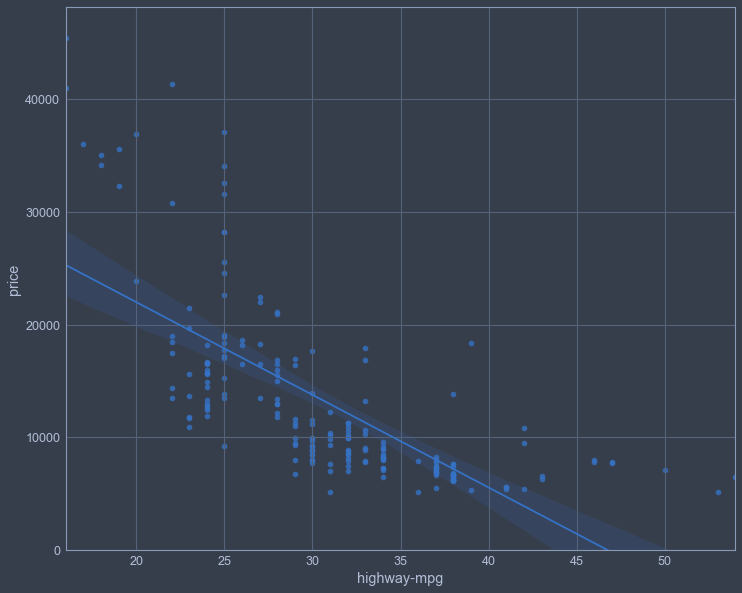

In [73]:
width = 12
height = 10

plt.figure(figsize = (width, height))
sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0,);

* Bu grafikten, regresyon eğimi negatif olduğu için fiyatın otoyol-mpg ile negatif olarak ilişkili olduğunu görebiliriz. Bir regresyon grafiğine bakarken akılda tutulması gereken bir şey, veri noktalarının regresyon çizgisi etrafında ne kadar dağınık olduğuna dikkat etmektir. Bu size verilerin varyansına ve doğrusal bir modelin en uygun olup olmayacağına dair iyi bir gösterge verecektir. Veriler çizgiden çok uzaksa, bu doğrusal model bu veriler için en iyi model olmayabilir. Bu grafiği, "peak-rpm" regresyon grafiği ile karşılaştıralım.

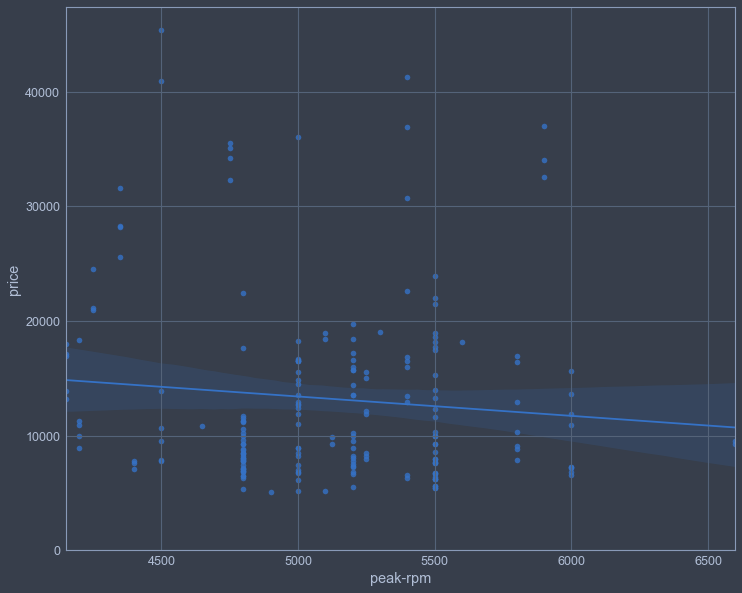

In [74]:
plt.figure(figsize = (width, height))
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,);

* "peak-rpm" ve "highway-mpg" regresyon grafiğini karşılaştırdığımızda, "highway-mpg" için noktaların üretilen hatta çok daha yakın olduğunu ve ortalama düşüşte olduğunu görüyoruz. "peak-rpm" noktaları, tahmin edilen çizgi etrafında daha fazla yayılır ve "highway-mpg" arttıkça noktaların azaldığını veya arttığını belirlemek çok daha zordur.

In [75]:
# Korelasyon ile bunu kanıtlayalım.

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### **_Artıklar Grafiği_**
* Verinin varyansını görselleştirmenin iyi bir yolu, artık bir grafik kullanmaktır.
* Bir regresyon grafiğine baktığımızda artık, veri noktasından uydurulmuş regresyon çizgisine olan mesafedir.
* Noktalar, x ekseni etrafına rastgele dağılmışsa, veriler için doğrusal bir model uygundur.
* Kalıntıların rastgele dağılması, varyansın sabit olduğu ve dolayısıyla doğrusal modelin bu veriler için uygun olduğu anlamına gelir.

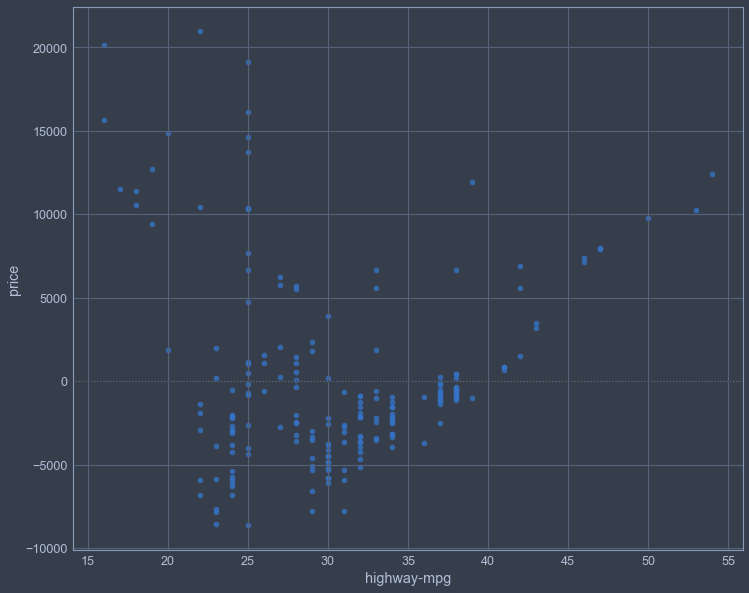

In [76]:
width = 12
height = 10

plt.figure(figsize = (width, height))
sns.residplot(df["highway-mpg"], df["price"])
plt.show();

* Bu artık grafiğinden, artıkların x ekseni etrafına rastgele dağılmadığını görebiliriz. Bu da bizi bu veriler için doğrusal olmayan bir modelin daha uygun olduğuna inanmaya götürür.

# Çoklu Doğrusal Regresyonu Görselleştirme Kullanarak Değerlendirme

In [77]:
y_hat = model.predict(X)
y_hat[0:5]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211]])

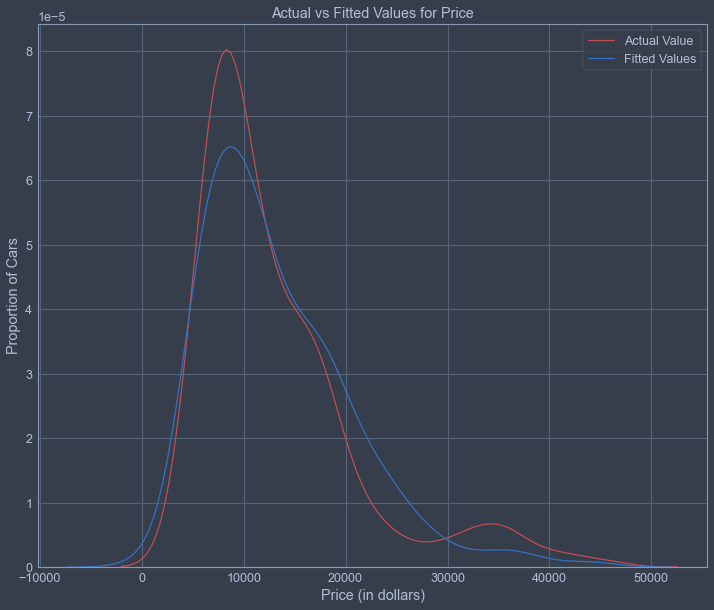

In [78]:
plt.figure(figsize = (width, height))

ax1 = sns.distplot(df["price"], hist = False, color = "r", label = "Actual Value")
sns.distplot(y_hat, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")
plt.show()
plt.close();

* İki dağılım biraz üst üste geldiğinden, uyan değerlerin gerçek değerlere makul ölçüde yakın olduğunu görebiliriz. Bununla birlikte, kesinlikle iyileştirilmesi gereken bir yer var.

# Polynomial Regression & Pipelines

* Polinom regresyon, genel lineer regresyon modelinin veya çoklu lineer regresyon modellerinin özel bir durumudur.
* Yordayıcı değişkenlerin yüksek dereceli terimlerini karesini alarak veya belirleyerek doğrusal olmayan ilişkiler elde ederiz.

In [79]:
# independent_variable = bağımsız değişken
# dependent_variabble = bağımlı değişken
# np.linspace(15,55,100) = 15-55 arası 100 sayı

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variabble, ".", x_new, y_new, "-")
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    
    fig = plt.gcf()
    
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()

In [80]:
X = df["highway-mpg"]
y = df["price"]

* Polyfit işlevini kullanarak polinomu sığdıralım, ardından polinom işlevini görüntülemek için poly1d işlevini kullanalım.

In [81]:
f = np.polyfit(X, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


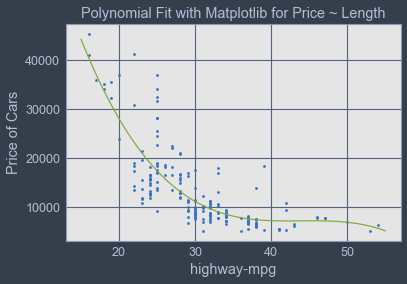

In [82]:
PlotPolly(p, X, y, "highway-mpg")

In [83]:
np.polyfit(X, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

* Bu polinom modelinin doğrusal modelden daha iyi performans gösterdiğini çizdiğimizde zaten görebiliyoruz. Bunun nedeni, oluşturulan polinom işlevinin daha fazla veri noktasına "çarpması" dır.

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [85]:
# degree = derece

pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [86]:
X = df[["horsepower","curb-weight","engine-size","highway-mpg"]]

pr_model = pr.fit_transform(X)
pr_model[0:5]

array([[1.000000e+00, 1.110000e+02, 2.548000e+03, 1.300000e+02,
        2.700000e+01, 1.232100e+04, 2.828280e+05, 1.443000e+04,
        2.997000e+03, 6.492304e+06, 3.312400e+05, 6.879600e+04,
        1.690000e+04, 3.510000e+03, 7.290000e+02],
       [1.000000e+00, 1.110000e+02, 2.548000e+03, 1.300000e+02,
        2.700000e+01, 1.232100e+04, 2.828280e+05, 1.443000e+04,
        2.997000e+03, 6.492304e+06, 3.312400e+05, 6.879600e+04,
        1.690000e+04, 3.510000e+03, 7.290000e+02],
       [1.000000e+00, 1.540000e+02, 2.823000e+03, 1.520000e+02,
        2.600000e+01, 2.371600e+04, 4.347420e+05, 2.340800e+04,
        4.004000e+03, 7.969329e+06, 4.290960e+05, 7.339800e+04,
        2.310400e+04, 3.952000e+03, 6.760000e+02],
       [1.000000e+00, 1.020000e+02, 2.337000e+03, 1.090000e+02,
        3.000000e+01, 1.040400e+04, 2.383740e+05, 1.111800e+04,
        3.060000e+03, 5.461569e+06, 2.547330e+05, 7.011000e+04,
        1.188100e+04, 3.270000e+03, 9.000000e+02],
       [1.000000e+00, 1.1500

In [87]:
X.shape # orjinal veri

(201, 4)

In [88]:
pr_model.shape # dönüşümden sonraki veri

(201, 15)

# Pipeline

* Verileri işleme adımlarını basitleştirir.

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

* Modelin veya tahmin edicinin adını ve karşılık gelen kurucusunu içeren bir tuple listesi oluşturarak işlem hattını oluşturuyoruz.

In [90]:
Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias = False)), ("model", LinearRegression())]
Input

[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [91]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

* Verileri normalleştirebilir, bir dönüşüm gerçekleştirebilir ve modeli aynı anda sığdırabiliriz.

In [92]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [93]:
y_pipe = pipe.predict(X)
y_pipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Örnek İçi Değerlendirmeye Yönelik Önlemler

* Modellerimizi değerlendirirken, sadece sonuçları görselleştirmek istemiyoruz, aynı zamanda modelin ne kadar doğru olduğunu belirlemek için nicel bir ölçü istiyoruz.
* Belirleme katsayısı olarak da bilinen **R-squared**, verilerin uyan regresyon çizgisine ne kadar yakın olduğunu gösteren bir ölçüdür.
* **R-squared** değeri, doğrusal bir model tarafından açıklanan yanıt değişkeninin (y) değişim yüzdesidir.
* **Ortalama Kare Hata (MSE)**, hataların karelerinin ortalamasını, yani gerçek değer (y) ile tahmini değer (ŷ) arasındaki farkı ölçer.

In [94]:
X = df[["highway-mpg"]]
y = df[["price"]]

lm.fit(X,y)

print("R-squared:", lm.score(X,y))

R-squared: 0.4965911884339176


In [95]:
y_hat = lm.predict(X)

print("y_hat:" "\n", y_hat[0:4])

y_hat:
 [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
# Tahmin edilen sonuçları gerçek sonuçlarla karşılaştırıyoruz.

MSE = mean_squared_error(df["price"], y_hat)

print("MSE:", MSE)

MSE: 31635042.944639888


In [98]:
X = df[["horsepower","curb-weight","engine-size","highway-mpg"]]
y = df[["price"]]

lm.fit(X,y)

print("R-squared", lm.score(X,y))

R-squared 0.8093562806577457


In [99]:
y_hat = lm.predict(X)

MSE = mean_squared_error(y, y_hat)

print("MSE:", MSE)

MSE: 11980366.87072649


In [100]:
from sklearn.metrics import r2_score

In [101]:
X = df[["highway-mpg"]]

r_squared = r2_score(y, p(X))

print('R-squared:', r_squared)

R-squared: 0.6741946663906522


In [102]:
mean_squared_error(y, p(X))

20474146.426361203

# Tahmin ve Karar Verme

### **_Tahmin_**
* Çizim için pyplot'u içe aktaralım; numpy'nin bazı işlevlerini de kullanacağız.

In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# np.arange 1'den 100'e kadar 1'er artsın

new_input = np.arange(1,100,1).reshape(-1,1)

In [105]:
X = df[["highway-mpg"]]
y = df[["price"]]

lm.fit(X,y)
lm

LinearRegression()

In [106]:
y_predict = lm.predict(new_input)
y_predict[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

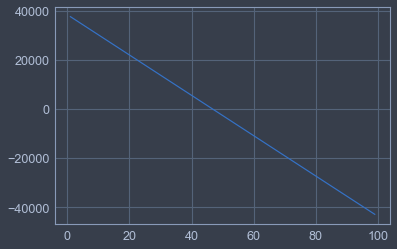

In [107]:
plt.plot(new_input, y_predict)
plt.show()

# Karar Verme: İyi Bir Model Uyumunu Belirleme

* Modelleri karşılaştırırken, daha yüksek R kare değerine sahip model, veriler için daha uygundur.
* Modelleri karşılaştırırken, en küçük MSE değerine sahip model veriler için daha uygundur.

# Model Değerlendirme ve İyileştirme

In [108]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv"

df = pd.read_csv(url)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [109]:
# İlk önce sadece sayısal verileri kullanalım.

df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [110]:
# Çizim için kütüphane

!pip install ipywidgets

In [111]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [112]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    
    width = 12
    height = 10
    
    plt.figure(figsize = (width, height))
    
    ax1 = sns.distplot(RedFunction, hist = False, color = "r", label = RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color = "b", label = BlueName, ax = ax1)
    
    plt.title(Title)
    plt.xlabel("Price (indollars)")
    plt.ylabel("Proportion of Cars")
    
    plt.show()
    plt.close()

In [113]:
def PollyPlot(X_train, X_test, y_train, y_test, lr, poly_transform):
    
    width = 12
    height = 10
    
    plt.figure(figsize = (width, height))
    
    x_max = max([X_train.values.max(), X_test.values.max()])
    x_min = min([X_train.values.min(), X_test.values.min()])
    
    x = np.arange(x_min, x_max, 0.1)
    
    plt.plot(X_train, y_train, "ro", label = "Training Data")
    plt.plot(X_test, y_test, "go", label = "Test Data")
    plt.plot(X, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = "Predicted Function")
    plt.ylim([-10000,60000])
    plt.ylabel("Price")
    plt.legend()

In [114]:
X = df.drop("price", axis = 1)
y = df["price"]

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)

print("number of test samples:", X_test.shape[0])
print("number of training samples:", X_train.shape[0])

number of test samples: 21
number of training samples: 180


In [116]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression()

In [117]:
lm.fit(X_train[["horsepower"]], y_train)

LinearRegression()

In [118]:
# Test verilerindeki R^2'yi hesaplayalım.

lm.score(X_test[["horsepower"]], y_test)

0.3635875575078824

In [119]:
# Test verilerini kullanarak R^2'nin çok daha küçük olduğunu görebiliriz.

lm.score(X_train[["horsepower"]], y_train)

0.6619724197515103

# Cross-validation Score

In [120]:
from sklearn.model_selection import cross_val_score

R_cross = cross_val_score(lm, X[["horsepower"]], y, cv = 4)
R_cross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [121]:
# Tahmininizin ortalama ve standart sapmasını hesaplayabiliriz.

print("The mean of the folds are", R_cross.mean(), "and the standard deviation is" , R_cross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


In [122]:
# "Puanlama" metriğini "neg_mean_squared_error" olarak ayarlayarak negatif kare hatayı puan olarak kullanabiliriz.

-1*cross_val_score(lm, X[["horsepower"]], y, cv = 4, scoring = "neg_mean_squared_error")

array([20254142.84026705, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [123]:
# Çıkışı tahmin etmek için 'cross_val_predict' fonksiyonunu da kullanabilirsiniz. 
# Fonksiyon, verileri test etmek için bir katı kullanarak ve diğer katlar eğitim için kullanarak verileri belirtilen kat sayısına böler.

from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(lm, X[['horsepower']], y, cv = 4)
y_predict[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting and Model Selection

* Bazen örneklem dışı veriler olarak adlandırılan test verilerinin, modelinizin gerçek dünyada ne kadar iyi performans gösterdiğinin çok daha iyi bir ölçüsü olduğu ortaya çıktı.
* Bunun bir nedeni aşırı uyum sağlamaktır; bazı örnekleri gözden geçirelim.
* Görünüşe göre bu farklılıklar Çoklu Doğrusal Regresyon ve Polinomsal Regresyon'da daha belirgindir, bu nedenle bu bağlamda aşırı uyumu inceleyeceğiz.

In [124]:
lr = LinearRegression()
lr.fit(X_train[["horsepower","curb-weight","engine-size","highway-mpg"]], y_train)

LinearRegression()

In [125]:
y_predict_train = lr.predict(X_train[["horsepower","curb-weight","engine-size","highway-mpg"]])
y_predict_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [126]:
y_predict_test = lr.predict(X_test[["horsepower","curb-weight","engine-size","highway-mpg"]])
y_predict_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

* Eğitim ve test verilerimizi ayrı ayrı kullanarak bazı model değerlendirmeleri yapalım. İlk olarak, çizim için seaborn ve matplotlibb kitaplığını içe aktarıyoruz.

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

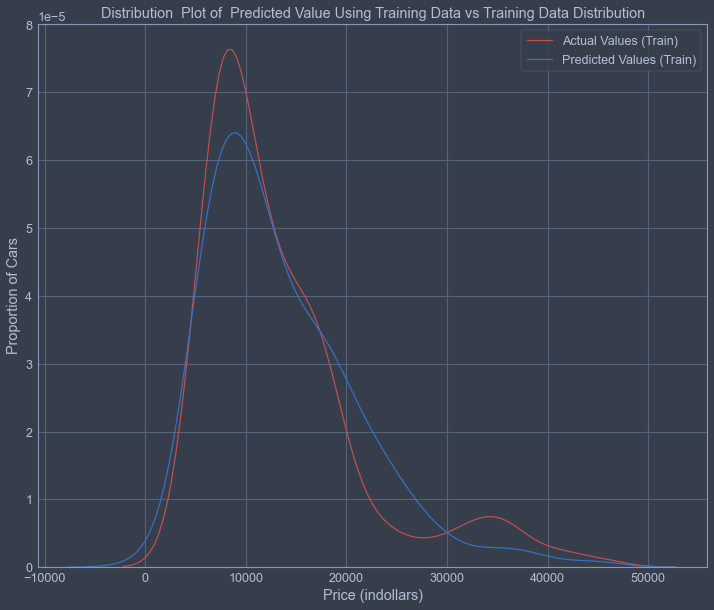

In [128]:
# Eğitim verilerinin tahmin edilen değerlerinin dağılımını inceleyelim.

Title = "Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution"
DistributionPlot(y_train, y_predict_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

* Eğitim verileri ile karşılaştırılan eğitim verilerini kullanarak tahmin edilen değerlerin grafiği.

* Şimdiye kadar model, eğitim veri setinden öğrenmede başarılı görünüyor. Ancak model, test veri kümesinden yeni verilerle karşılaştığında ne olur? Model test verilerinden yeni değerler ürettiğinde, tahmin edilen değerlerin dağılımının gerçek hedef değerlerden çok farklı olduğunu görüyoruz.

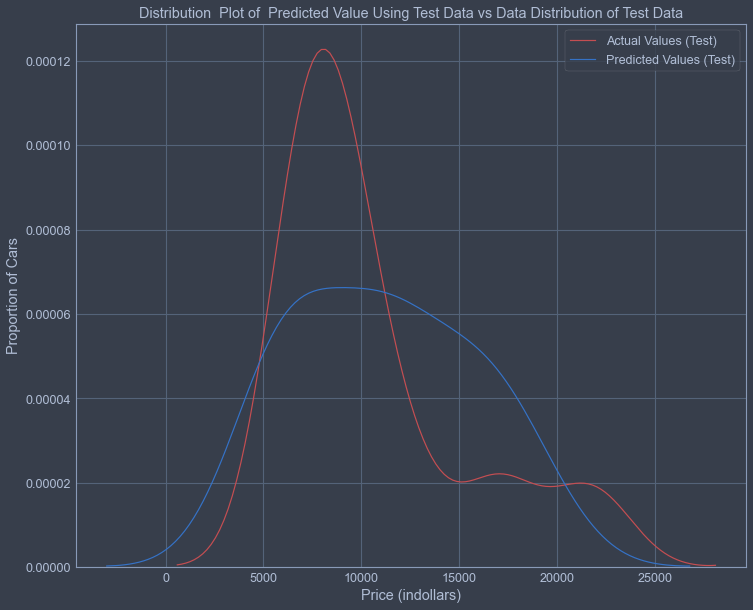

In [129]:
Title = "Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data"
DistributionPlot(y_test, y_predict_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

* Test verileri ile karşılaştırılan test verileri kullanılarak tahmin edilen değerin grafiği.

* Şekil 1 ve Şekil 2'nin Karşılaştırılması; Şekil 1'deki test verilerinin dağılımının verileri uydurmada çok daha iyi olduğu açıktır. Şekil 2'deki bu fark, aralıkların 5000 ila 15000 arasında olduğu yerlerde belirgindir. Bu, dağıtım şeklinin son derece farklı olduğu yerdir. Bakalım polinom regresyonu, test veri setini analiz ederken tahmin doğruluğunda da bir düşüş sergiliyor mu?

#### **_Overfitting_**

In [130]:
from sklearn.preprocessing import PolynomialFeatures

* Aşırı uyum, model gürültüye uyduğunda oluşur, temeldeki süreç değil.
* Bu nedenle, modelinizi test setini kullanarak test ederken, modeliniz, ilişkiyi oluşturan temel süreç değil, modelleme gürültüsü kadar iyi performans göstermez.
* Beşinci derece polinom modeli oluşturalım.

In [131]:
# Verilerin yüzde 55'ini eğitim, geri kalanını test için kullanalım.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state = 0)

# "horsepower" özelliği üzerinde derece 5 polinom dönüşümü gerçekleştireceğiz.

pr = PolynomialFeatures(degree = 5)

X_train_pr = pr.fit_transform(X_train[["horsepower"]])
X_test_pr = pr.fit_transform(X_test[["horsepower"]])

pr

PolynomialFeatures(degree=5)

In [132]:
# Şimdi doğrusal bir regresyon modeli "poli" yaratıp onu eğitelim.

poly = LinearRegression()
poly.fit(X_train_pr, y_train)

LinearRegression()

In [133]:
# Modelimizin çıktısını "predict" yöntemini kullanarak görebiliriz.
# Daha sonra değerleri "y_predict"e atayın.

y_predict = poly.predict(X_test_pr)
y_predict[0:5]

array([ 6728.77547414,  7308.09791963, 12213.83954918, 18893.06169793,
       19995.73194318])

In [134]:
# Öngörülen ilk beş değeri alıp gerçek hedeflerle karşılaştıralım.

print("Predicted values:", y_predict[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77547414  7308.09791963 12213.83954918 18893.06169793]
True values: [ 6295. 10698. 13860. 13499.]


In [135]:
# Eğitim verilerinin R^2'si

poly.score(X_train_pr, y_train)

0.5567716899771691

In [136]:
# Test verilerinin R^2'si

poly.score(X_test_pr, y_test)

-29.87184147296421

* R^2 ne kadar düşükse, model o kadar kötüdür. Negatif R^2 aşırı uymanın bir işaretidir.

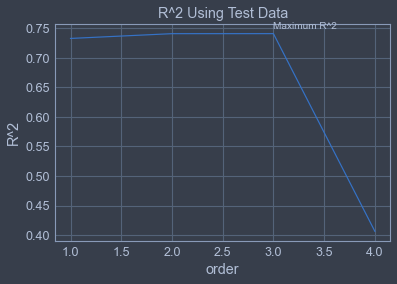

In [137]:
# Farklı sıralı polinomlar için test verilerinde R^2'nin nasıl değiştiğini görelim ve sonuçları grafiğe dökelim.

R_squ_test = []

order = [1,2,3,4]

for n in order:
    
    pr = PolynomialFeatures(degree = n)
    
    X_train_pr = pr.fit_transform(X_train[["horsepower"]])
    X_test_pr = pr.fit_transform(X_test[["horsepower"]])
    
    lr.fit(X_train_pr, y_train)
    
    R_squ_test.append(lr.score(X_test_pr, y_test))
    
plt.plot(order, R_squ_test)
plt.xlabel("order")
plt.ylabel("R^2")
plt.title("R^2 Using Test Data")
plt.text(3, 0.75, "Maximum R^2");

* Üçüncü derece polinom kullanılıncaya kadar R^2'nin kademeli olarak arttığını görüyoruz. Daha sonra R^2, dörtte sert bir şekilde azalır.

# Ridge Regresyon

* Bu bölümde **Ridge Regresyonunu** inceleyeceğiz, Alfa parametresinin modeli nasıl değiştirdiğini göreceğiz.

In [138]:
# Verilerimiz üzerinde ikinci derece polinom dönüşümü gerçekleştirelim.

pr = PolynomialFeatures(degree = 2)

X_train_pr = pr.fit_transform(X_train[["horsepower","curb-weight","engine-size","highway-mpg","normalized-losses","symboling"]])
X_test_pr = pr.fit_transform(X_test[["horsepower","curb-weight","engine-size","highway-mpg","normalized-losses","symboling"]])

In [139]:
from sklearn.linear_model import Ridge

# Regresyon parametresini 0.1 olarak ayarlayarak bir Ridge regresyon nesnesi oluşturalım.

model = Ridge(alpha = 0.1)
model.fit(X_train_pr, y_train)

Ridge(alpha=0.1)

In [140]:
y_predict = model.predict(X_test_pr)

# Tahmin edilen ilk beş numuneyi test setimizle karşılaştıralım.

print('predicted:', y_predict[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set: [ 6295. 10698. 13860. 13499.]


* Test hatasını en aza indiren Alpha değerini seçiyoruz, örneğin bir for döngüsü kullanabiliriz.

In [141]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []

# np.array(0,1000) = 0'dan 1000'e kadar yazdır.

Alpha = 10*np.array(range(0,1000))

for alpha in Alpha:
    RigeModel = Ridge(alpha = alpha) 
    RigeModel.fit(X_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(X_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(X_train_pr, y_train))

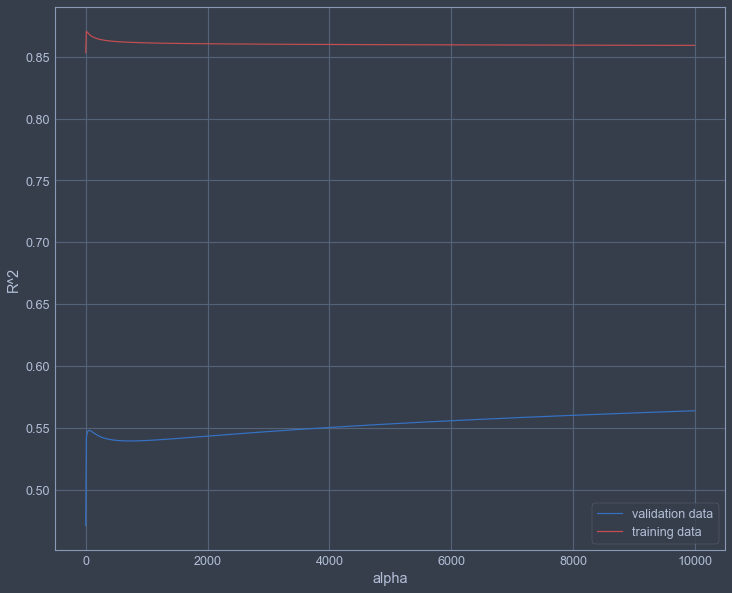

In [142]:
# Farklı Alfalar için R^2'nin değerini çizebiliriz.

width = 12
height = 10

plt.figure(figsize = (width, height))
plt.plot(Alpha, Rsqu_test, label = "validation data")
plt.plot(Alpha, Rsqu_train, "r", label = "training data")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend();

* Mavi çizgi, doğrulama verilerinin R^2'sini temsil eder.

* Kırmızı çizgi, eğitim verilerinin R^2'sini temsil eder.

* X ekseni, Alfa'nın farklı değerlerini temsil eder.

* Burada model aynı veriler üzerinde oluşturulmuş ve test edilmiştir. Yani eğitim ve test verileri aynı.

# Grid Search

* Alfa terimi bir hiperparametredir, sklearn en iyi hiperparametreyi bulma sürecini daha basit hale getirmek için **GridSearchCV** sınıfına sahiptir.

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
# Bir parametre değerleri sözlüğü oluşturuyoruz.

parameters1 = [{"alpha" : [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [145]:
RR = Ridge()
RR

Ridge()

In [146]:
Grid1 = GridSearchCV(RR, parameters1, cv = 4)
Grid1.fit(X[["horsepower","curb-weight","engine-size","highway-mpg"]], y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [147]:
# Nesne, doğrulama verilerinde en iyi parametre değerlerini bulur. 
# Tahmin ediciyi en iyi parametrelere sahip olarak elde edebilir ve bunu BestRR değişkenine aşağıdaki gibi atayabiliriz.

BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [148]:
BestRR.score(X_test[["horsepower","curb-weight","engine-size","highway-mpg"]], y_test)

0.8411649831036149